In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
df.shape

(891, 12)

In [97]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
df.drop('Cabin',inplace=True,axis=1)

In [99]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [100]:
df['Age'].mean()

29.69911764705882

In [101]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [102]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [103]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
df.dropna(inplace=True)

In [105]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [106]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [107]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [108]:
df['Embarked'].nunique()

3

In [109]:
df['Ticket'].nunique()

680

In [110]:
df['PassengerId'].nunique()

889

In [111]:
df['Pclass'].nunique()

3

In [112]:
df['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [113]:
from sklearn.preprocessing import LabelEncoder

In [114]:
lb = LabelEncoder()

In [115]:
df['Sex'] = lb.fit_transform(df['Sex'])
df['Embarked'] = lb.fit_transform(df['Embarked'])


In [116]:
df['Ticket'] = lb.fit_transform(df['Ticket'])

In [117]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Ticket           int32
Fare           float64
Embarked         int32
dtype: object

In [118]:
df['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [119]:
df['SibSp'].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [120]:
df['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [121]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#### Excluding columns

1) PassengerID<br>
2) Name<br>
3) Ticket<br>

In [122]:
x = df.iloc[:,[2,4,5,6,7,9,10]]  # independent variables
y = df['Survived']  # dependent variable
print(x.shape)
print(y.shape)

(889, 7)
(889,)


In [123]:
print(type(x),type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [124]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [125]:
x.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [126]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [127]:
df.shape

(889, 11)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(666, 7)
(223, 7)
(666,)
(223,)


In [130]:
x_tr.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

### Model-1

In [131]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier

In [132]:
from sklearn.svm import SVC

In [133]:
from sklearn.metrics import confusion_matrix,classification_report

In [134]:
def apply_model(model):
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred))

In [135]:
#### 1) Decision Tree Model

In [136]:
# m1 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=10)
# apply_model(m1)

In [137]:
#### 2) Random Forest Classifier

In [138]:
# m2 = RandomForestClassifier(n_estimators=80,criterion='gini',max_depth=8,min_samples_split=12)
# apply_model(m2)

In [139]:
#### 3) LogisticRegression

In [140]:
# m3 = LogisticRegression(solver='liblinear')
# apply_model(m3)

In [141]:
#### 4) KNN Classifier

In [142]:
# m4 = KNeighborsClassifier(n_neighbors=35)
# apply_model(m4)

#### SVM Classifier

Accuracy 0.7623318385650224
Predicted values
 [1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0
 0]
Confusion Matrix
 [[112  21]
 [ 32  58]]


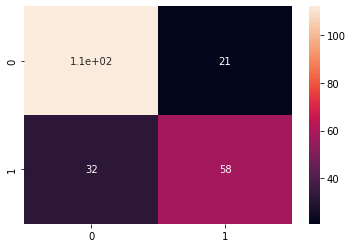

Classification report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       133
           1       0.73      0.64      0.69        90

    accuracy                           0.76       223
   macro avg       0.76      0.74      0.75       223
weighted avg       0.76      0.76      0.76       223



In [143]:
m5 = SVC(kernel='linear',C=1)
apply_model(m5)

In [144]:
### Model2 - Feature Selection

In [145]:
# df.corr()['Survived']

In [146]:
### Excuded columns

'''1) PassengerID<br>
2) Name<br>
3) Pclass<br>
4) Sex<br>
5) Ticket<br>'''

'1) PassengerID<br>\n2) Name<br>\n3) Pclass<br>\n4) Sex<br>\n5) Ticket<br>'

In [147]:
# df.columns

In [148]:
# x = df.iloc[:,[5,6,7,9,10]]
# y = df.iloc[:,[1]]
# print(type(x),type(y))

In [149]:
# x.head()

In [150]:
# y.head()

In [151]:
# x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
# print(x_tr.shape)
# print(x_te.shape)
# print(y_tr.shape)
# print(y_te.shape)

In [152]:
#### 6) Decision Tree Classifier

In [153]:
# m6 = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=10)
# apply_model(m6)

In [154]:
#### 7) RandomForestClassifier

In [155]:
# m7 = RandomForestClassifier(n_estimators=70,criterion='entropy',min_samples_split=10)
# apply_model(m7)

In [156]:
#### 8) LogisticRegression

In [157]:
# m8 = LogisticRegression(solver='liblinear')
# apply_model(m8)

In [158]:
#### 9) KNN Classifier

In [159]:
# m9 = KNeighborsClassifier(n_neighbors=27)
# apply_model(m9)

In [160]:
#### SVM Classifier

In [161]:
# m10 = SVC(kernel='linear',C=1)
# apply_model(m10)